In [3]:
print("I Wayan Rangga Rijasa - 0706022210019")
print("Pima Indians Diabetes Database")

I Wayan Rangga Rijasa - 0706022210019
Pima Indians Diabetes Database


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [5]:
url = 'https://raw.githubusercontent.com/RanggaRijasa/DataMining2024/refs/heads/main/diabetes.csv'
df = pd.read_csv(url)
df.head(5)

## import, read, and display first 5 data of the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

## provide summary of the dataframe while also checking for missing value
## no missing value found, no data cleaning needed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

## Displays descriptive statistics of each numerical columns in the dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


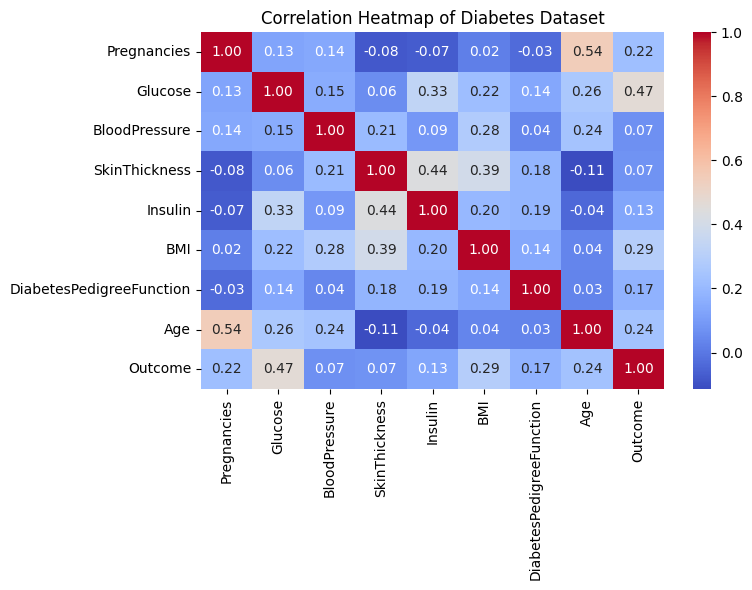

It highlights that glucose levels have the strongest positive correlation with the outcome, indicating that higher glucose levels are strongly associated with the likelihood of having diabetes.


In [8]:
# Visualization 1: Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.tight_layout()
plt.show()

print("It highlights that glucose levels have the strongest positive correlation with the outcome, indicating that higher glucose levels are strongly associated with the likelihood of having diabetes.")

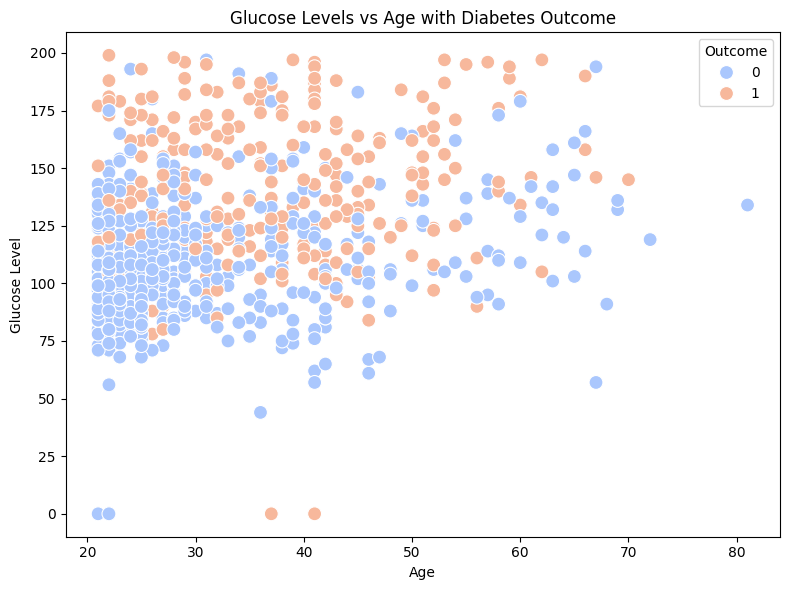

 It shows that individuals with higher glucose levels, especially in older age groups, are more likely to have a positive diabetes outcome. This insight can help identify at-risk age groups based on glucose levels.


In [9]:
# Visualization 2: Glucose levels vs Age with Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Glucose', hue='Outcome', data=df, palette='coolwarm', s=100)
plt.title('Glucose Levels vs Age with Diabetes Outcome')
plt.xlabel('Age')
plt.ylabel('Glucose Level')
plt.tight_layout()
plt.show()

print(" It shows that individuals with higher glucose levels, especially in older age groups, are more likely to have a positive diabetes outcome. This insight can help identify at-risk age groups based on glucose levels.")

In [10]:
## Machine Learning Preparation

x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)

## splits the dataset into training and test sets and prints the shape (number of rows and columns) of the training and test feature datasets.

X_train shape: (614, 8)
X_test shape: (154, 8)


Model accuracy  score with criterion entropy: 0.7662
Training set score: 0.7752
Test set score: 0.7662


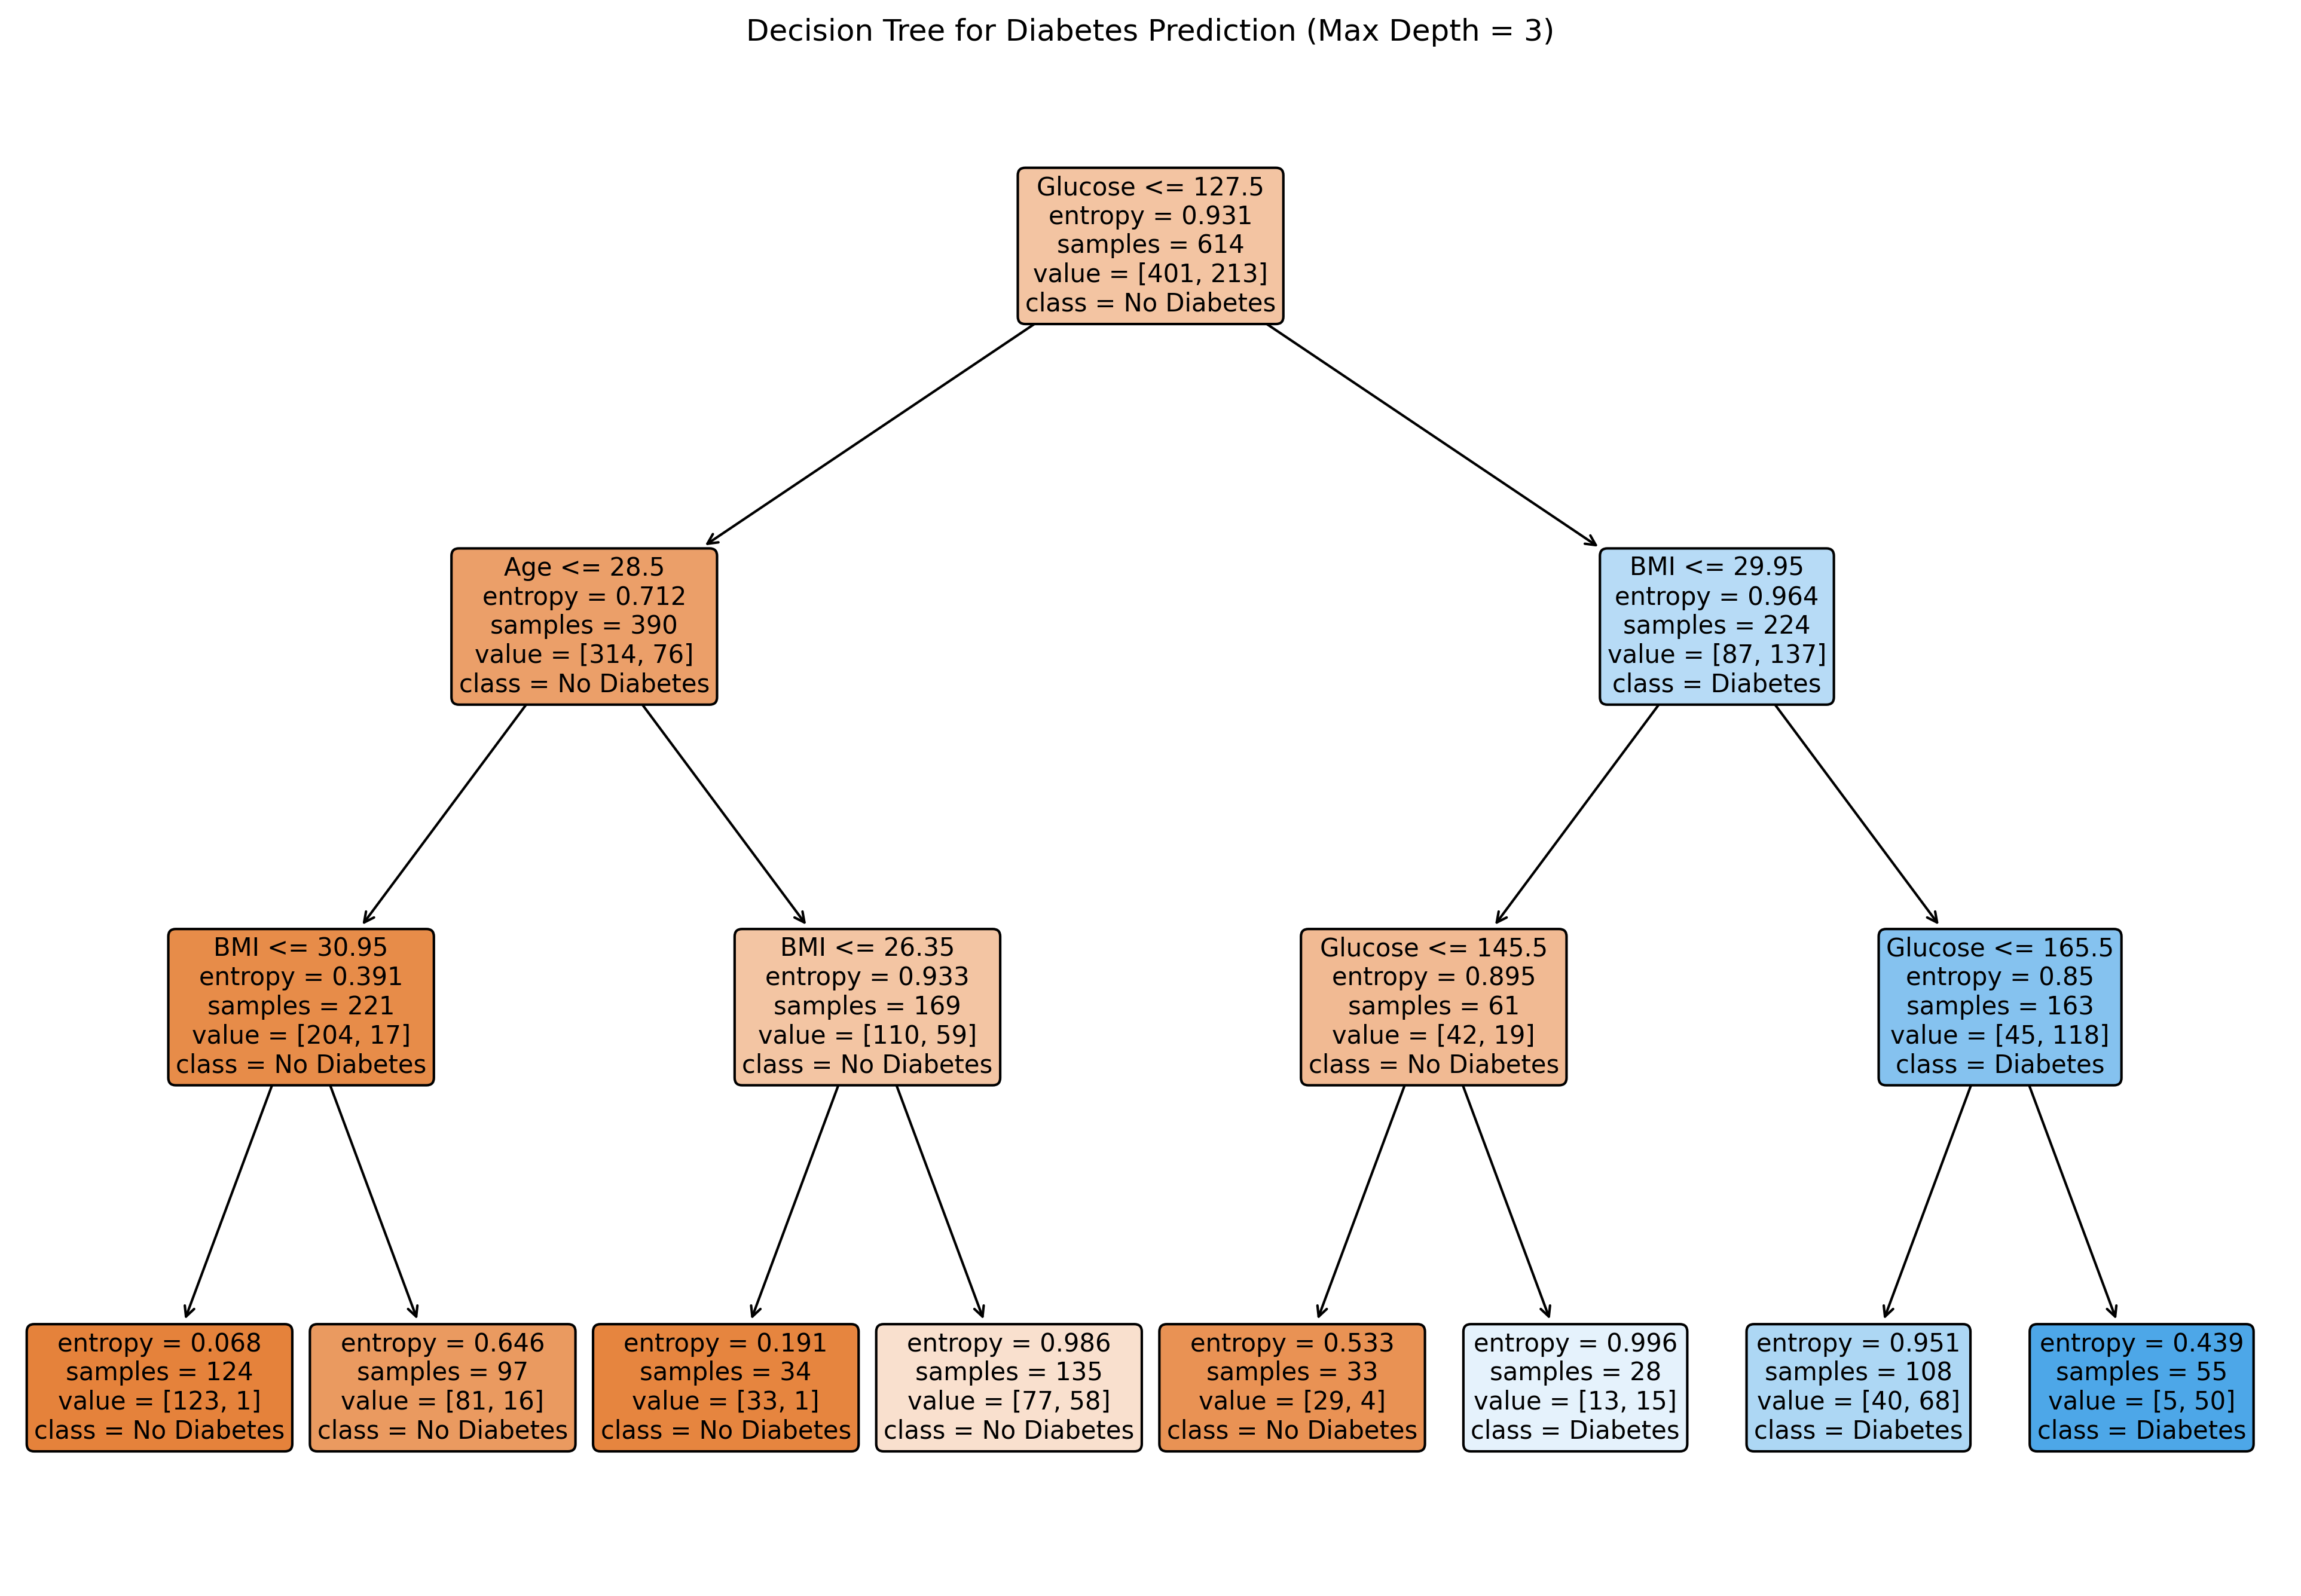

In [11]:
## Decision Tree
## Criterion Entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
clf_en.fit(x_train,y_train)

y_pred_en = clf_en.predict(x_test)

print("Model accuracy  score with criterion entropy: {0:0.4f}".format(accuracy_score(y_test,y_pred_en)))

print("Training set score: {0:0.4f}".format(clf_en.score(x_train,y_train)))
print("Test set score: {0:0.4f}".format(clf_en.score(x_test,y_test)))

plt.figure(figsize=(13, 9), dpi=300)

clf_en.fit(x_train, y_train)

tree.plot_tree(clf_en, 
               feature_names=x_train.columns,  
               class_names=['No Diabetes', 'Diabetes'],  
               filled=True,  
               rounded=True,  
               fontsize=10,   
               max_depth=3)   

plt.title("Decision Tree for Diabetes Prediction (Max Depth = 3)")
plt.tight_layout()  
plt.show()

## creates a decision tree using entropy with a depth of 3 and random_state=0 to ensures reproducibility for the tree’s structure.
## use the trained model to make predictions on the test set
## calculates and computes the model accuracy
## creates and displays the decision tree of entropy

Model accuracy  score with criterion gini: 0.7597
Training set score: 0.7769
Test set score: 0.7597


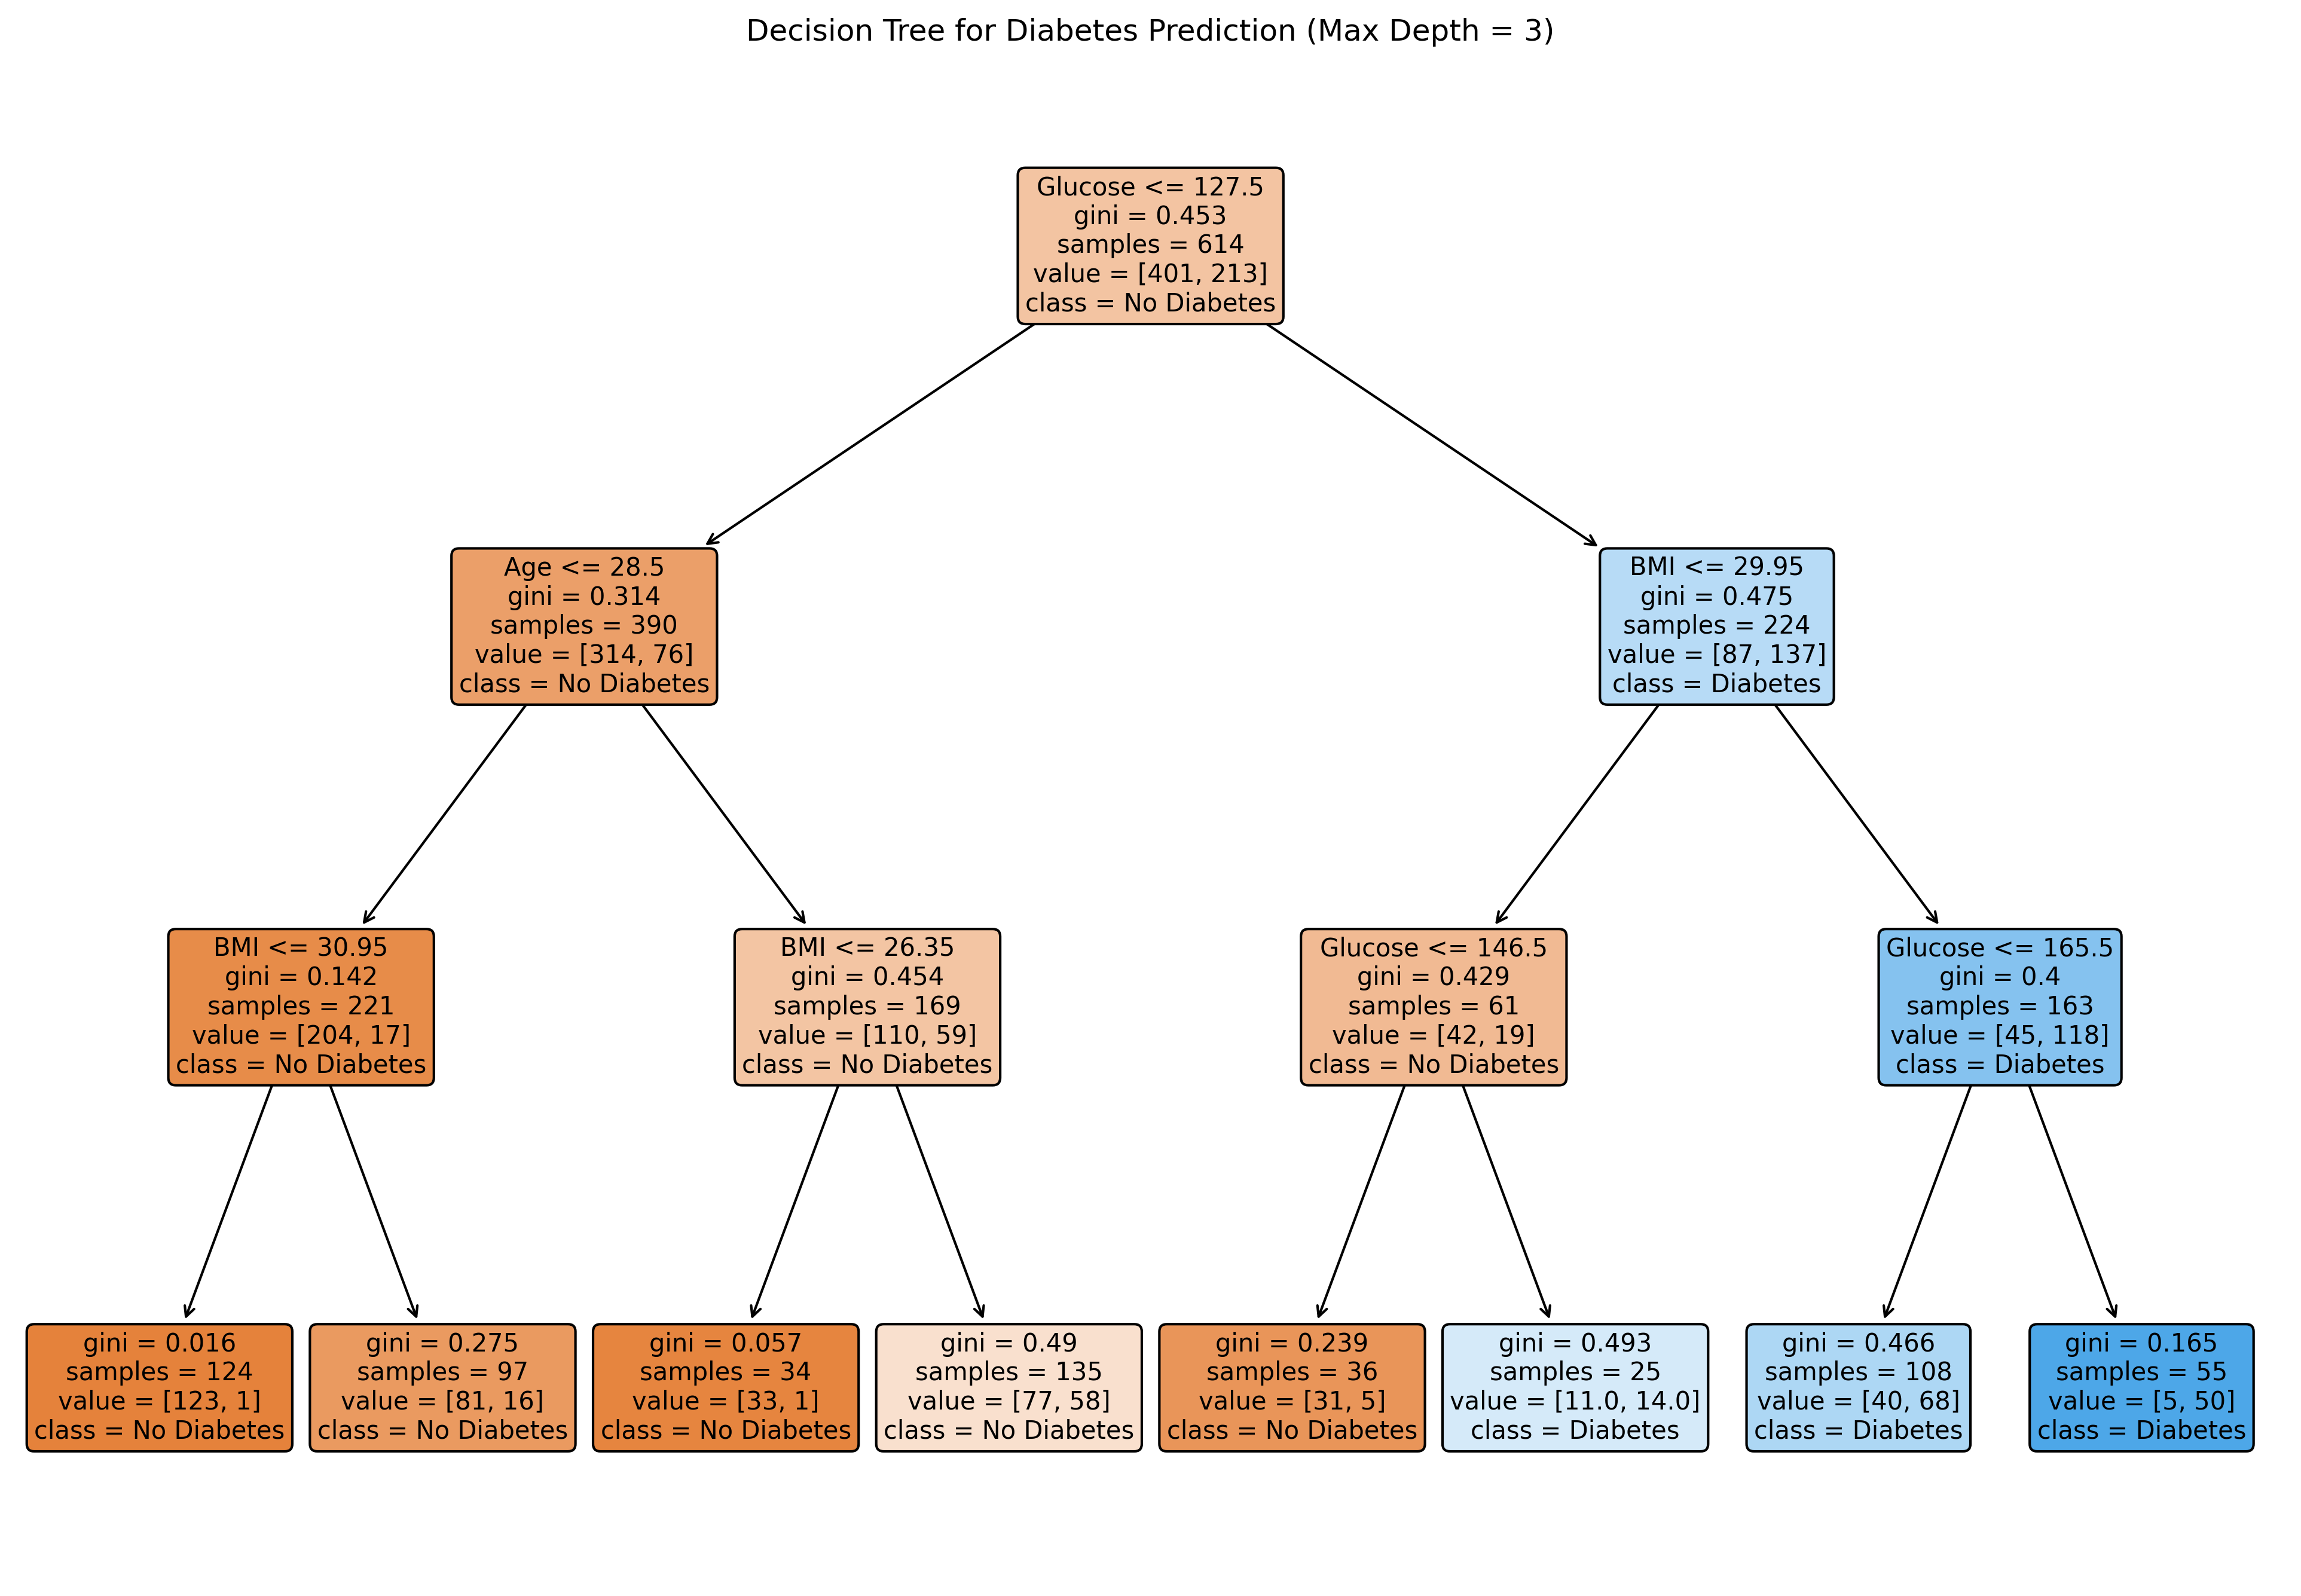

In [12]:
## Criterion Gini Index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(x_train,y_train)

y_pred_gini = clf_gini.predict(x_test)

print("Model accuracy  score with criterion gini: {0:0.4f}".format(accuracy_score(y_test,y_pred_gini)))

print("Training set score: {0:0.4f}".format(clf_gini.score(x_train,y_train)))
print("Test set score: {0:0.4f}".format(clf_gini.score(x_test,y_test)))

plt.figure(figsize=(13, 9), dpi=300)

clf_en.fit(x_train, y_train)

tree.plot_tree(clf_gini, 
               feature_names=x_train.columns,  
               class_names=['No Diabetes', 'Diabetes'],  
               filled=True,  
               rounded=True,  
               fontsize=10,   
               max_depth=3)   

plt.title("Decision Tree for Diabetes Prediction (Max Depth = 3)")
plt.tight_layout()  
plt.show()

## creates a decision tree using gini with a depth of 3 and random_state=0 to ensures reproducibility for the tree’s structure.
## use the trained model to make predictions on the test set
## calculates and computes the model accuracy
## creates and displays the decision tree of gini

In [13]:
print("Classification Report Entropy")
print(classification_report(y_test, y_pred_en))

print("Classification Report gini")
print(classification_report(y_test, y_pred_gini))

## generates a detailed classification report for the entropy-based and gini-based models

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

Classification Report gini
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [14]:
## Naive Bayes

nb_classifier = GaussianNB()
nb_classifier.fit(x_train,y_train)

nb_y_pred = nb_classifier.predict(x_test)

print("Model accuracy  score with Naive Bayes: {0:0.4f}".format(accuracy_score(y_test,nb_y_pred)))

print("Classification Report")
print(classification_report(y_test, nb_y_pred))

## creates a Naive Bayes classifier using the Gaussian distribution.
## use the trained model to make predictions on the test set
## calculates the accuracy of the Naive Bayes model by comparing the predicted values (nb_y_pred) with the actual values (y_test).
## generates a detailed classification report that includes the following metrics for each class

Model accuracy  score with Naive Bayes: 0.7662
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [16]:
## Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

## creates a Random Forest Classifier
## use the trained model to make predictions on the test set
## The model makes predictions on the test data, and the performance is evaluated using accuracy, confusion matrix, and classification report.

Accuracy: 72.08%
Confusion Matrix:
[[77 22]
 [21 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



In [17]:
## Conclusion

print("Among Entropy, Gini, Naive Bayes, and Random Forest Classifier, Naive Bayes achieved the highest accuracy at 77%, slightly outperforming both Gini and Entropy, which each had an accuracy of 76%.")

Among Entropy, Gini, Naive Bayes, and Random Forest Classifier, Naive Bayes achieved the highest accuracy at 77%, slightly outperforming both Gini and Entropy, which each had an accuracy of 76%.
